# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import csv

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Import Dataset from MOH Github Page

In [2]:
cases_by_death = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv')
cases_by_vaccination = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_state.csv')

# Explore the Dataset

## Get the First 5 Row of Each Dataset

In [3]:
cases_by_death.head()

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0,0,0


In [4]:
cases_by_vaccination.head()

,date,state,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,Johor,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get Dataset Information 

In [5]:
cases_by_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13616 entries, 0 to 13615
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            13616 non-null  object
 1   state           13616 non-null  object
 2   deaths_new      13616 non-null  int64 
 3   deaths_bid      13616 non-null  int64 
 4   deaths_new_dod  13616 non-null  int64 
 5   deaths_bid_dod  13616 non-null  int64 
 6   deaths_unvax    13616 non-null  int64 
 7   deaths_pvax     13616 non-null  int64 
 8   deaths_fvax     13616 non-null  int64 
 9   deaths_boost    13616 non-null  int64 
 10  deaths_tat      13616 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.1+ MB


In [6]:
cases_by_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8112 entries, 0 to 8111
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  8112 non-null   object
 1   state                 8112 non-null   object
 2   daily_partial         8112 non-null   int64 
 3   daily_full            8112 non-null   int64 
 4   daily_booster         8112 non-null   int64 
 5   daily_booster2        8112 non-null   int64 
 6   daily                 8112 non-null   int64 
 7   daily_partial_adol    8112 non-null   int64 
 8   daily_full_adol       8112 non-null   int64 
 9   daily_booster_adol    8112 non-null   int64 
 10  daily_booster2_adol   8112 non-null   int64 
 11  daily_partial_child   8112 non-null   int64 
 12  daily_full_child      8112 non-null   int64 
 13  daily_booster_child   8112 non-null   int64 
 14  daily_booster2_child  8112 non-null   int64 
 15  cumul_partial         8112 non-null   

## Get Dataset Description

In [7]:
cases_by_death.describe()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
count,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000
mean,2.632491,0.558240,2.632491,0.558240,1.625955,0.462030,0.483182,0.061325,1.559709
std,9.884403,2.878311,9.601525,2.453352,6.224848,2.933069,1.416449,0.374528,6.756406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,359.000000,84.000000,191.000000,63.000000,119.000000,68.000000,18.000000,9.000000,204.000000


In [8]:
cases_by_vaccination.describe()

,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,daily_partial_child,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
count,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,...,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000
mean,3431.886341,3373.361440,1992.321376,25.098619,8822.667776,366.406065,356.408654,5.502465,0.023176,217.789571,...,1.961415,1.192801,0.008629,26.569650,0.946499,0.010478,1.323595,0.878205,0.350345,0.022189
std,8401.411810,8266.235376,5861.436119,124.407708,15280.486845,1901.840276,1850.453609,16.444622,0.185015,909.316999,...,9.733490,9.502366,0.128243,251.830885,12.457739,0.259954,13.736677,8.063715,2.914309,0.819411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,55.000000,0.000000,0.000000,696.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,384.000000,14.000000,0.000000,2828.500000,12.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2380.250000,2296.000000,853.000000,10.000000,10178.500000,74.000000,68.000000,3.000000,0.000000,20.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110488.000000,110917.000000,74328.000000,3103.000000,176412.000000,29267.000000,26709.000000,245.000000,4.000000,19882.000000,...,225.000000,255.000000,6.000000,7706.000000,441.000000,19.000000,462.000000,374.000000,116.000000,68.000000


## Get Dataset Size

In [9]:
cases_by_death.size

149776

In [10]:
cases_by_vaccination.size

413712

## Get Dataset Shape

In [11]:
cases_by_death.shape

(13616, 11)

In [12]:
cases_by_vaccination.shape

(8112, 51)

## Find Duplicates in the Dataset

In [13]:
cases_by_death.duplicated().sum()

0

In [14]:
cases_by_vaccination.duplicated().sum()

0

## Find Null Values in the Dataset

In [15]:
cases_by_death.isnull().sum()

date              0
state             0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64

In [16]:
cases_by_vaccination.isnull().sum()

date                    0
state                   0
daily_partial           0
daily_full              0
daily_booster           0
daily_booster2          0
daily                   0
daily_partial_adol      0
daily_full_adol         0
daily_booster_adol      0
daily_booster2_adol     0
daily_partial_child     0
daily_full_child        0
daily_booster_child     0
daily_booster2_child    0
cumul_partial           0
cumul_full              0
cumul_booster           0
cumul_booster2          0
cumul                   0
cumul_partial_adol      0
cumul_full_adol         0
cumul_booster_adol      0
cumul_booster2_adol     0
cumul_partial_child     0
cumul_full_child        0
cumul_booster_child     0
cumul_booster2_child    0
pfizer1                 0
pfizer2                 0
pfizer3                 0
pfizer4                 0
sinovac1                0
sinovac2                0
sinovac3                0
sinovac4                0
astra1                  0
astra2                  0
astra3      

# Data Preparation 

## Dropping Unrelated Columns 

In [17]:
cases_by_death = cases_by_death[['date','state','deaths_new']]

In [18]:
cases_by_vaccination = cases_by_vaccination[['date','state','daily']]

## Converting Date Format for the Dataset

In [19]:
cases_by_death['date'] = pd.to_datetime(cases_by_death['date']).dt.to_period('M')

In [20]:
cases_by_vaccination['date'] = pd.to_datetime(cases_by_vaccination['date']).dt.to_period('M')

## Sum up Specific Cases Using Date and State

In [21]:
cases_by_death = cases_by_death.groupby(['date','state']).sum().reset_index()

In [22]:
cases_by_vaccination = cases_by_vaccination.groupby(['date','state']).sum().reset_index()

In [23]:
cases_by_vaccination

,date,state,daily
0,2021-02,Johor,913
1,2021-02,Kedah,829
2,2021-02,Kelantan,162
3,2021-02,Melaka,275
4,2021-02,Negeri Sembilan,1
...,...,...,...
283,2022-07,Selangor,43140
284,2022-07,Terengganu,3435
285,2022-07,W.P. Kuala Lumpur,29565
286,2022-07,W.P. Labuan,389


## Combine the Death and Vaccination Dataset

In [24]:
final_dataset = pd.merge(cases_by_death, cases_by_vaccination, on = ['date','state'],how='inner')

## Rename the Columns

In [25]:
final_dataset.columns = ['Date', 'State', 'Total Death', 'Total Vaccination']

## View the New Dataset

In [26]:
final_dataset.head()

,Date,State,Total Death,Total Vaccination
0,2021-02,Johor,29,913
1,2021-02,Kedah,5,829
2,2021-02,Kelantan,8,162
3,2021-02,Melaka,9,275
4,2021-02,Negeri Sembilan,10,1


In [45]:
code = ['kl','lb','pj','jhr','kdh','kel','mlk','ngs','phg','png','prk','pls','sbh','srw','slg','tg']
state_order = ['W.P. Kuala Lumpur','W.P. Labuan','W.P. Putrajaya', 'Johor','Kedah','Kelantan','Melaka','Negeri Sembilan','Pahang',
               'Pulau Pinang','Perak','Perlis','Sabah','Sarawak','Selangor','Terengganu']

for i in range (16):
    final_dataset.loc[final_dataset['State'] == state_order[i], 'id'] = i+1
    final_dataset.loc[final_dataset['State'] == state_order[i], 'Code'] = code[i]
    
final_dataset



,Date,State,Total Death,Total Vaccination,Code,id
0,2021-02,Johor,29,913,jhr,3.0
1,2021-02,Kedah,5,829,kdh,4.0
2,2021-02,Kelantan,8,162,kel,5.0
3,2021-02,Melaka,9,275,mlk,6.0
4,2021-02,Negeri Sembilan,10,1,ngs,7.0
...,...,...,...,...,...,...
283,2022-07,Selangor,16,43140,slg,14.0
284,2022-07,Terengganu,3,3435,tg,15.0
285,2022-07,W.P. Kuala Lumpur,2,29565,kl,1.0
286,2022-07,W.P. Labuan,0,389,lb,16.0


# Find Correlation Between Data

<AxesSubplot:>

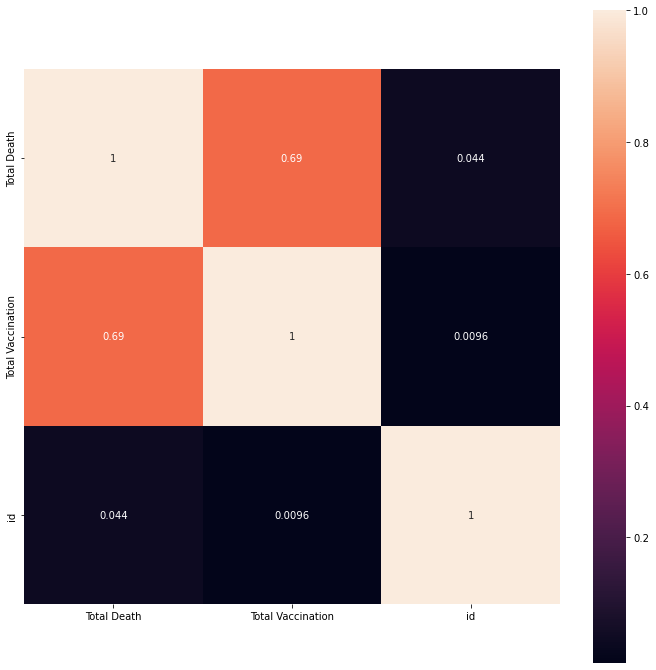

In [47]:
death_correlation = final_dataset.corr() #find correlation 
plt.subplots(figsize=(12,12)) #determine size of chart
sns.heatmap(death_correlation,annot=True, square=True) # plot heatmap 

# Export the Dataset as CSV

In [48]:
final_dataset.to_csv('death_to_vacc_dataset.csv', index = False)